# Projeto final - Introdução a IA

Alunos: Adriel Ferreira, Jessica Nagahama e Kamily Assis

## Algoritmo A * para múltiplos caminhos com atualização do ponto inicial

Nosso objetivo é fazer com que o algoritmo encontre o menor caminho para um dos objetivos plantados no mapa, sem que digamos exatamente qual a coordenada desse ponto. Após encontrá-lo, esse objetivo se torna um ponto inicial para achar outro objetivo no mapa. O algoritmo finaliza até todos os objetivos terem sido encontrados.


### Importação de bibliotecas

In [261]:
import numpy as np
import matplotlib.pyplot as plt 

### Algoritmo A *

In [243]:
class No():

    def __init__(self, pai=None, coordenada=None):
        self.pai = pai
        self.coordenada = coordenada

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.coordenada == other.coordenada


def calcular_h_score(coordenada, destino):
    """Calcula o h-score usando a distância euclidiana"""
    return np.sqrt(((coordenada[0] - destino[0])**2) + ((coordenada[1] - destino[1])**2))


def gerar_filhos(matriz, no_atual, end_no):
    """Gera os filhos válidos de um nó"""
    children = []
    for nova_coordenada in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Quadrados adjacentes e na diagonal
        no_coordenada = (no_atual.coordenada[0] + nova_coordenada[0], no_atual.coordenada[1] + nova_coordenada[1])

        if 0 <= no_coordenada[0] < len(matriz) and 0 <= no_coordenada[1] < len(matriz[0]) and matriz[no_coordenada[0]][no_coordenada[1]] == 0:
            novo_no = No(no_atual, no_coordenada)
            novo_no.g = no_atual.g + 1
            novo_no.h = calcular_h_score(no_coordenada, end_no.coordenada)
            novo_no.f = novo_no.g + novo_no.h
            children.append(novo_no)

    return children


def a_star(matriz, inicio, final):
    """Executa o algoritmo A*"""
    no_inicial = No(None, inicio)
    no_final = No(None, final)

    lista_aberta = [no_inicial]
    lista_fechada = []

    while lista_aberta:
        lista_aberta.sort(key=lambda x: x.f) # Ordena a lista aberta pelo f-score
        no_atual = lista_aberta[0]
        lista_aberta.remove(no_atual)
        lista_fechada.append(no_atual)

        if no_atual == no_final:
            path = []
            while no_atual:
                path.append(no_atual.coordenada)
                no_atual = no_atual.pai
            return path[::-1]

        filhos = gerar_filhos(matriz, no_atual, no_final)

        for filho in filhos:
            if filho in lista_fechada:
                continue

            novo_g = no_atual.g + 1
            if filho in lista_aberta:
                # Mudança de pais
                if novo_g < filho.g:
                    filho.g = novo_g
                    filho.f = filho.g + filho.h
                    filho.pai = no_atual
            else:
                filho.g = novo_g
                filho.h = calcular_h_score(filho.coordenada, no_final.coordenada)
                filho.f = filho.g + filho.h
                filho.pai = no_atual
                lista_aberta.append(filho)

    return None





### Criação de matriz com obstaculos e objetivos colocados de forma aleatória

In [244]:
# Matriz com obstaculos e objetivos colocados de forma aleatória

def matriz_obstaculos_objetivos(tam_matriz, num_obstacles, num_objectives):
    
    matriz = np.zeros((tam_matriz,tam_matriz),dtype=int)
    
    linhas, colunas = matriz.shape
    obstaculos_added = 0
    objectives_added = 0

    np.random.seed(99)
    while obstaculos_added < num_obstacles:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 1
            obstaculos_added += 1

    while objectives_added < num_objectives:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 3
            objectives_added += 1
    
    matriz[0,5] = 0
    return matriz

In [245]:
matriz = matriz_obstaculos_objetivos(11, 20, 10)
matriz

array([[0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0],
       [0, 1, 3, 1, 0, 0, 0, 1, 0, 3, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 3, 0, 3, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]])

### Matriz sem obstáculos

In [246]:
matriz_sem_objetivos = matriz.copy()
matriz_sem_objetivos[matriz_sem_objetivos == 3] = 0
matriz_sem_objetivos

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Função para exibir mapa com os caminhos

In [259]:
def exibir_mapa_com_caminho(mapa, caminho, inicio, fim, cor_caminho='red'):
    # Converte o mapa para um array numpy para plotagem
    n_linhas, n_colunas = mapa.shape

    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    # Cria uma nova matriz de cores para representar o mapa
    cores_mapa = np.ones((n_linhas, n_colunas, 3))  # Inicializa com branco

    for i in range(n_linhas):
        for j in range(n_colunas):
            if mapa[i, j] == 1:  # Obstáculo
                cores_mapa[i, j] = [0.5, 0.5, 0.5]  # Cinza
            elif mapa[i, j] == 3:  # Objetivo
                cores_mapa[i, j] = [1, 1, 1]  # Branco
                plt.scatter(j, i, color='#FF99CC', s=100, marker='o', zorder=5)  # Bolinha vermelha

    plt.imshow(cores_mapa)

    # Caminho percorrido pelo algoritmo A*
    if caminho:
        caminho_array = np.array(caminho)
        plt.plot(caminho_array[:, 1], caminho_array[:, 0], color=cor_caminho, linewidth=3)

    # Posição inicial (círculo verde)
    plt.scatter(inicio[1], inicio[0], color='green', s=100, marker='o', zorder=5, label='Ponto de Partida')

    # Destino final (círculo vermelho)
    plt.scatter(fim[1], fim[0], color='red', s=100, marker='o', zorder=5, label='Ponto de Chegada')

    plt.legend()
    plt.title('Mapa com Caminho A*')
    plt.show()


### Chamada do algoritmo principal

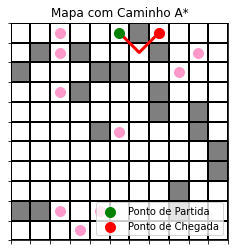

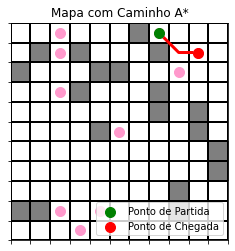

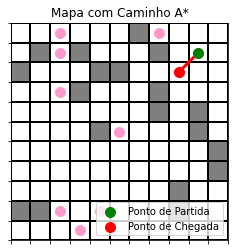

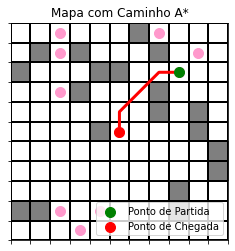

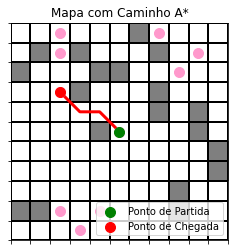

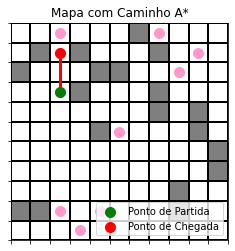

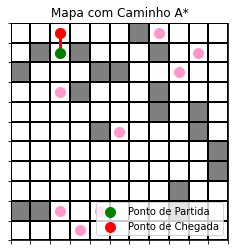

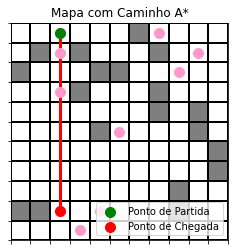

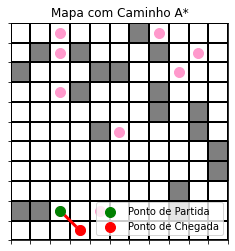

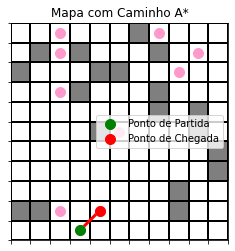

In [260]:
# armazenamento dos pontos de partida e pontos de chegada

objetivos = [(linha, coluna) for linha in range(11) for coluna in range(11) if matriz[linha][coluna] == 3]
pontos_partida = [(0,5)] + objetivos
pontos_chegada = objetivos 

# laço de repetição para plotar os mapas com os caminhos 

while pontos_chegada:

    if pontos_partida[0] == (0,5):
        inicio = pontos_partida[0]
    else:
        inicio = dest
    lista_h_scores = []
    for ponto in pontos_chegada:
        if ponto != inicio:
            h_score = calcular_h_score(inicio, ponto)
            lista_h_scores.append(h_score)
    indice_mais_proximo = lista_h_scores.index(min(lista_h_scores))
    dest = pontos_chegada[indice_mais_proximo]


    path = a_star(matriz_sem_objetivos, inicio, dest)
    exibir_mapa_com_caminho(matriz, path, inicio, dest)
    pontos_chegada.pop(indice_mais_proximo)
    pontos_partida.remove(inicio)
    